# PISON Technical Challenge

## Setup

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [15]:
# Import Packges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [18]:
col_names = ['timestamp',
             'channel_0_raw',
             'channel_1_raw',
             'channel_0_high_passed',
             'channel_1_high_passed',
             'quaternion_x',
             'quaternion_y',
             'quaternion_z',
             'quaternion_w',
             'gyroscope_x',
             'gyroscope_y',
             'gyroscope_z',
             'accelerometer_x',
             'accelerometer_y',
             'accelerometer_z',
             'body_movement',
             'repetition_num']
df_raw = pd.read_csv('pison_data_interview_2.csv', names=col_names)
print('data shape:', df_raw.shape)
df_raw.head(5)

data shape: (14981, 17)


,timestamp,channel_0_raw,channel_1_raw,channel_0_high_passed,channel_1_high_passed,quaternion_x,quaternion_y,quaternion_z,quaternion_w,gyroscope_x,gyroscope_y,gyroscope_z,accelerometer_x,accelerometer_y,accelerometer_z,body_movement,repetition_num
0,1514824.503,12535249,12566283,-11889,17295,0.32196,-0.596619,-0.621826,0.392090,-1.342870,1.063105,0.503576,-0.660156,-10.003906,1.21875,0,1
1,1514827.496,12536264,12559246,-2063,13384,0.32196,-0.596741,-0.621826,0.392029,-1.510729,1.175011,0.000000,-0.660156,-10.003906,1.21875,0,1
2,1514830.493,12538584,12565279,2757,16008,0.32196,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
3,1514833.500,12546745,12567024,7504,5644,0.32196,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
4,1514836.498,12537375,12545467,-3855,-15893,0.32196,-0.596802,-0.621765,0.391907,-1.063105,0.839294,-0.727388,-0.660156,-10.003906,1.21875,0,1


## EDA

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14981 entries, 0 to 14980
Data columns (total 17 columns):
timestamp                14981 non-null float64
channel_0_raw            14981 non-null int64
channel_1_raw            14981 non-null int64
channel_0_high_passed    14981 non-null int64
channel_1_high_passed    14981 non-null int64
quaternion_x             14981 non-null float64
quaternion_y             14981 non-null float64
quaternion_z             14981 non-null float64
quaternion_w             14981 non-null float64
gyroscope_x              14981 non-null float64
gyroscope_y              14981 non-null float64
gyroscope_z              14981 non-null float64
accelerometer_x          14981 non-null float64
accelerometer_y          14981 non-null float64
accelerometer_z          14981 non-null float64
body_movement            14981 non-null int64
repetition_num           14981 non-null int64
dtypes: float64(11), int64(6)
memory usage: 1.9 MB


In [20]:
df_raw.describe()

,timestamp,channel_0_raw,channel_1_raw,channel_0_high_passed,channel_1_high_passed,quaternion_x,quaternion_y,quaternion_z,quaternion_w,gyroscope_x,gyroscope_y,gyroscope_z,accelerometer_x,accelerometer_y,accelerometer_z,body_movement,repetition_num
count,1.498100e+04,1.498100e+04,1.498100e+04,14981.000000,1.498100e+04,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000
mean,1.566353e+06,1.253765e+07,1.251263e+07,62.550898,-2.571735e+02,0.263423,0.051271,0.111606,0.444427,6.407260,5.183960,2.237941,0.564972,-10.547218,2.064593,2.003071,1.991456
std,3.096750e+04,4.158465e+05,5.626673e+05,35397.290087,6.523863e+04,0.320534,0.395624,0.588643,0.335159,119.806613,346.986960,110.392775,7.242565,6.138921,6.852529,1.414352,0.815279
min,1.514825e+06,1.040201e+07,1.021268e+07,-422438.000000,-1.053204e+06,-0.897766,-0.777832,-1.000000,0.000000,-481.754550,-1830.891100,-623.763060,-34.382812,-48.960938,-27.765625,0.000000,1.000000
25%,1.538782e+06,1.245908e+07,1.233564e+07,-9221.000000,-1.041900e+04,0.032471,-0.085632,-0.304993,0.107849,-36.425343,-50.077854,-21.709728,-2.011719,-13.261719,-0.542969,1.000000,1.000000
50%,1.566517e+06,1.256078e+07,1.254805e+07,411.000000,3.980000e+02,0.230042,0.072815,0.036194,0.401611,-0.671435,-0.727388,1.678587,-0.363281,-9.816406,1.457031,2.000000,2.000000
75%,1.594422e+06,1.265877e+07,1.269320e+07,9792.000000,1.127500e+04,0.584961,0.329468,0.712097,0.754333,47.727833,50.413570,39.278942,3.582031,-7.398438,5.097656,3.000000,3.000000
max,1.618179e+06,1.419352e+07,1.504110e+07,640848.000000,1.726175e+06,0.905945,0.738708,1.000000,0.999268,427.312380,1828.317300,425.130220,37.671875,7.691406,33.898438,4.000000,3.000000


C:\Users\Kevin\Miniconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Kevin\Miniconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Kevin\Miniconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Kevin\Miniconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecatio

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A66B31DB38>,
      dtype=object)

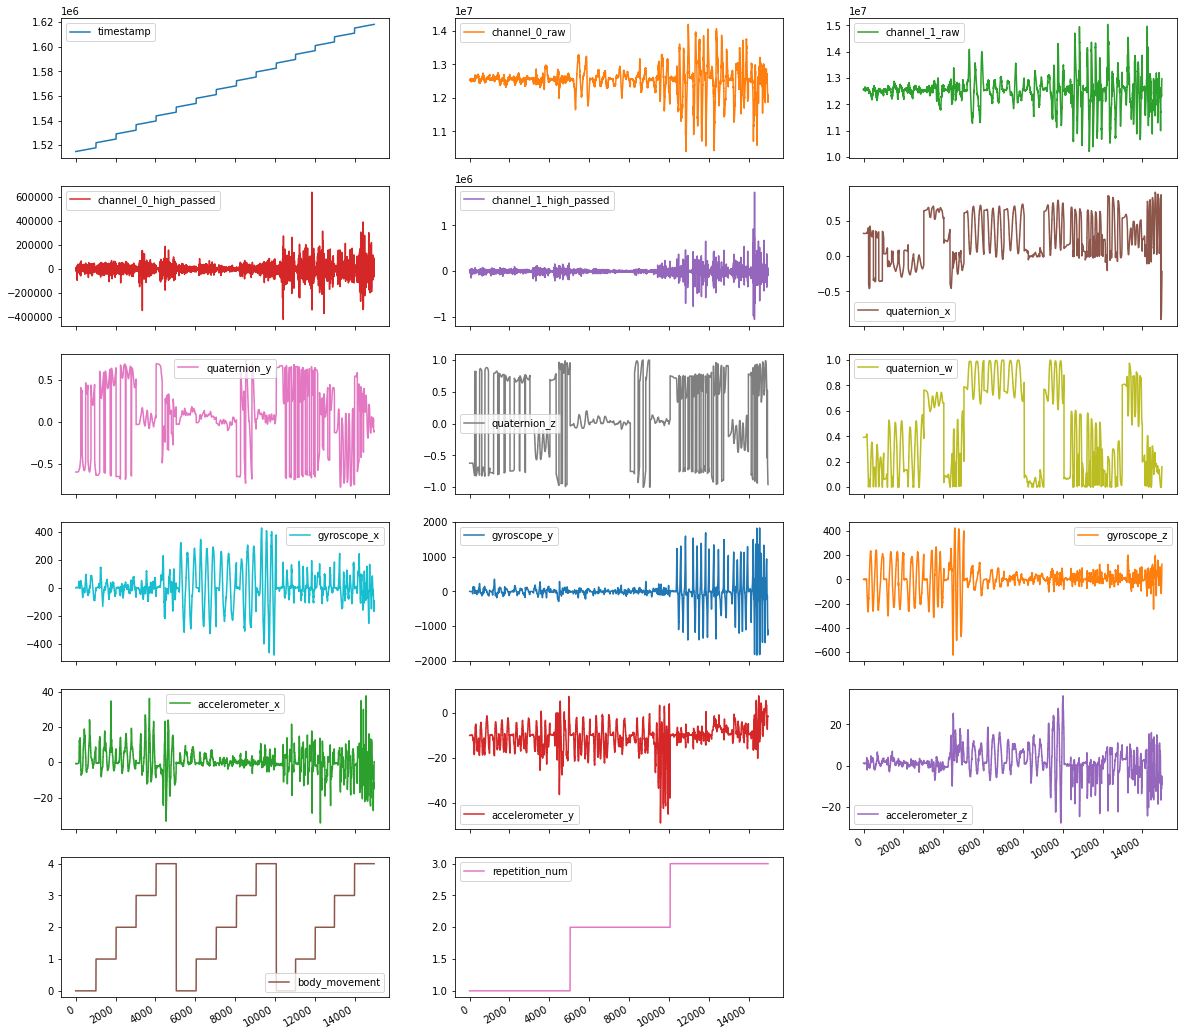

In [16]:
df_raw.plot(subplots=True, layout=(6, 3), figsize=(20, 20))

- The body movement seems to follow repeating pattern. Standing #1, standing #2, walking, walking fast, and running -> Repeat...
- Repetition num lines up with body movement segmentation. First around 5000, and 10,000, then about 15,000
- 